# Project: Customer Service Analysis of NYPD

<br>

### **Abstract:**

We grab complaints by neighborhood that respond to NYPD as we seen in the maps below. Our goals is try to undertand what else the department could be doing to adress the problems faster and more assertively.

<br>

### **Relevant research on the subject matter:**

NYC Open Data offers access to every data we need.

<br>

### **Walk through:**

1. Issue Understanding;
2. Data Understanding;
3. EDA;
4. Recommendations.
   
<br>

### **Author:**

Luiz Furtado <br>
[LinkedIn](https://www.linkedin.com/in/luiz-furtado-dev/) | [GitHub](https://github.com/TSLSouth)

<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4580\1353937417.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.shape

(300698, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

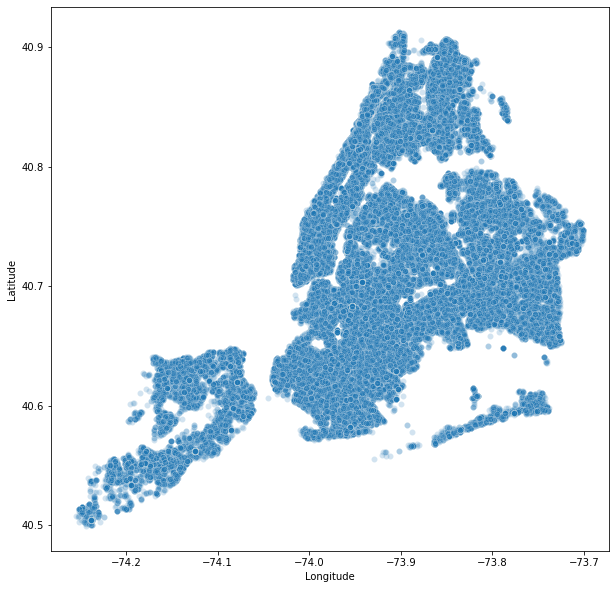

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue=df.value_counts(), alpha=0.2)

---

Aproximated map of NYPD Precincts:

![img nypd precincts](https://www.researchgate.net/profile/Eloise-Dunlap/publication/247923137/figure/fig1/AS:202655319236622@1425328201555/figure-fig1.png)

---

Complaint types:

<AxesSubplot:>

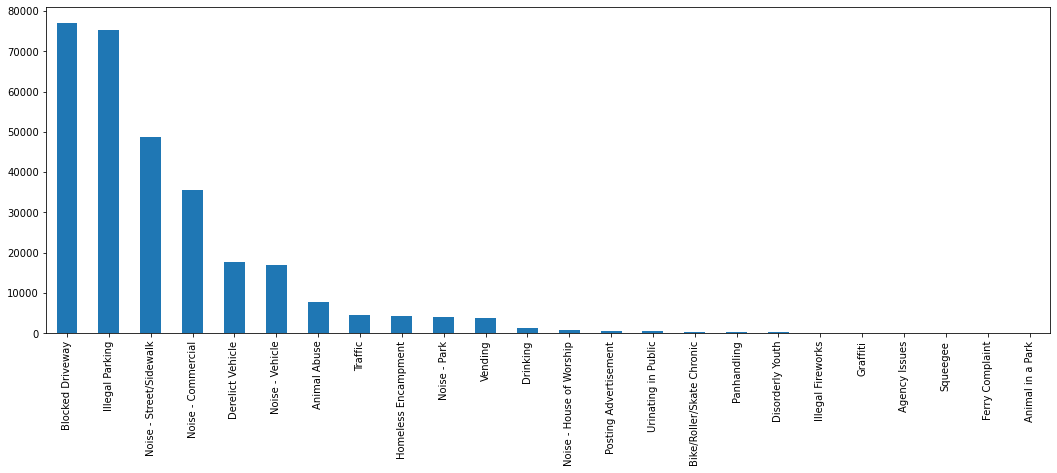

In [7]:
plt.figure(figsize=(18,6))
df['Complaint Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

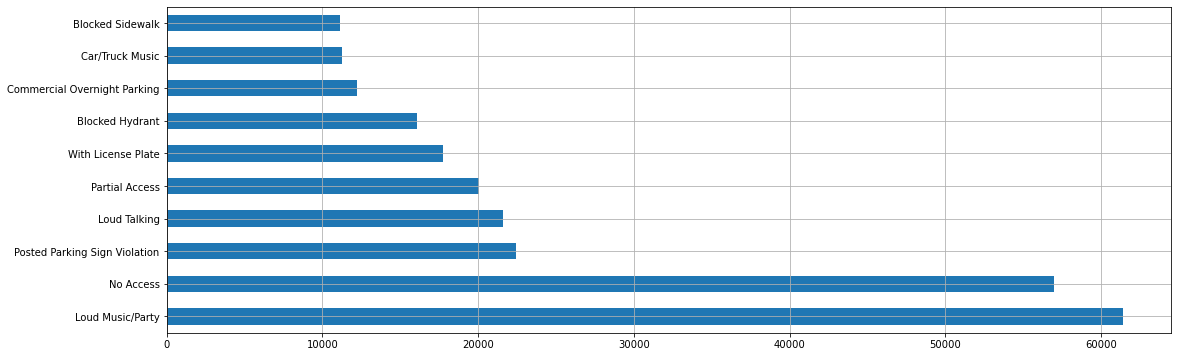

In [8]:
plt.figure(figsize=(18,6))
df['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True)

---
Quantity of complaints by borough:

<AxesSubplot:>

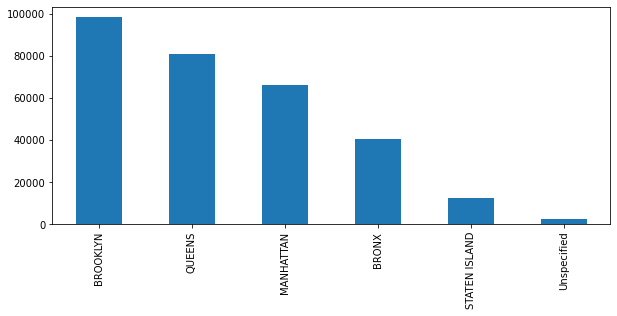

In [33]:
plt.figure(figsize=(10,4))
df['Borough'].value_counts().plot(kind='bar')

<AxesSubplot:>

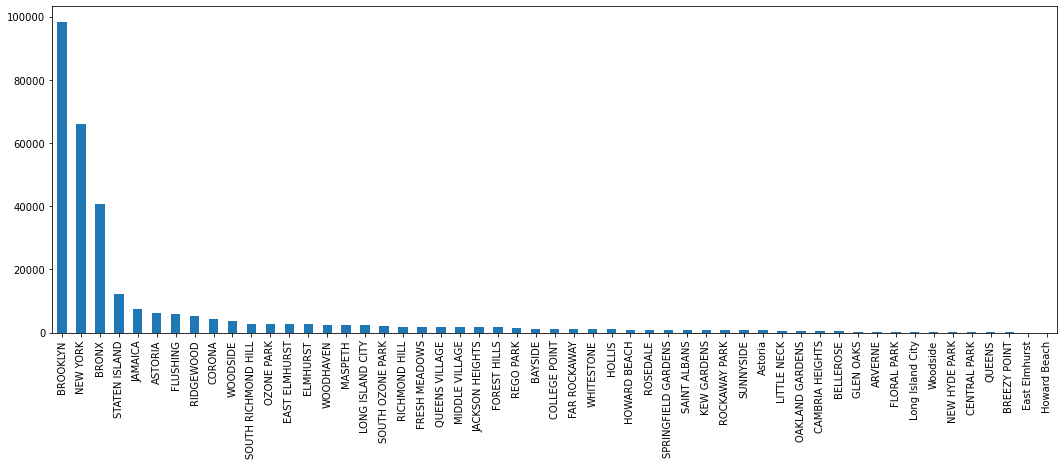

In [10]:
plt.figure(figsize=(18,6))
df['City'].value_counts().plot(kind='bar')

In [11]:
df.value_counts(['Borough', 'Complaint Type']).head(10)

Borough    Complaint Type         
QUEENS     Blocked Driveway           31644
BROOKLYN   Blocked Driveway           28148
           Illegal Parking            27462
QUEENS     Illegal Parking            21982
MANHATTAN  Noise - Street/Sidewalk    20550
           Noise - Commercial         14560
BROOKLYN   Noise - Street/Sidewalk    13355
BRONX      Blocked Driveway           12755
MANHATTAN  Illegal Parking            12132
BROOKLYN   Noise - Commercial         11463
dtype: int64

---
Biggest complaints in Brooklyn:

In [20]:
df_brooklyn = df.loc[(df['Borough'] == 'BROOKLYN')]

<AxesSubplot:>

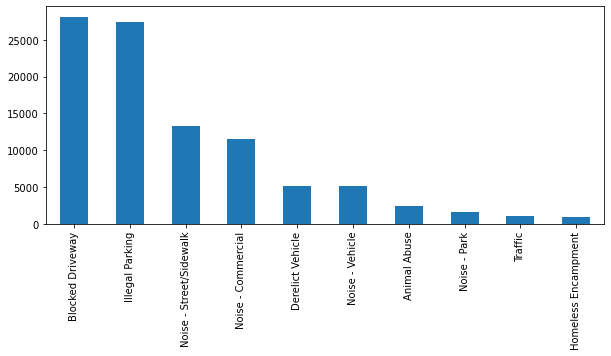

In [34]:
plt.figure(figsize=(10,4))
df_brooklyn['Complaint Type'].value_counts().head(10).plot(kind='bar')

**Observations:** Driveway questions are the primary 'problem' in Brooklyn followed by Noise.

---
Biggest complaints in Manhattan:

<AxesSubplot:>

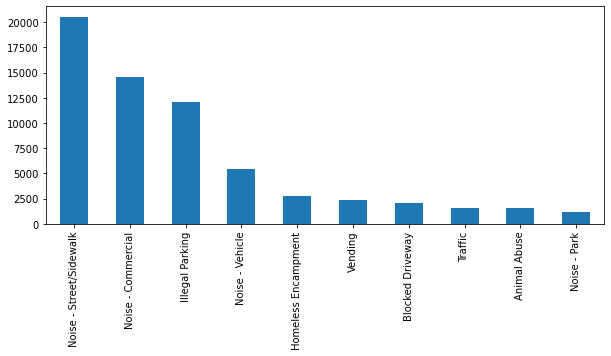

In [35]:
df_manhattan = df.loc[(df['Borough'] == 'MANHATTAN')]

plt.figure(figsize=(10,4))
df_manhattan['Complaint Type'].value_counts().head(10).plot(kind='bar')

**Observations:** Noise is the primary 'problem' in Manhattan and homeless encampment shows up as a problem.

---
Noise problem has been rising in NY: 
<br>
Source: [NYC Open Data](https://data.cityofnewyork.us/Social-Services/311-Noise-Complaints/p5f6-bkga)

![img noise graph](https://indowwindows.com/wp-content/uploads/2020/01/noise-complaints-nyc.png)

---
Biggest complaints in Queens:

<AxesSubplot:>

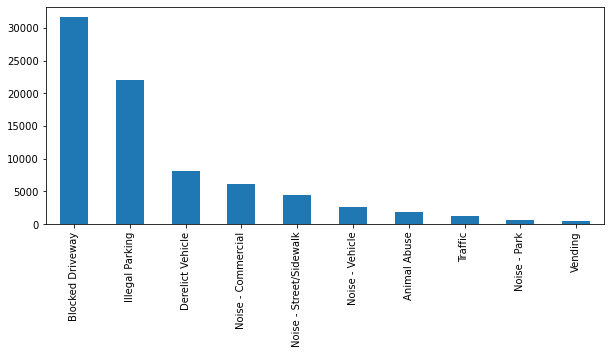

In [36]:
df_queens = df.loc[(df['Borough'] == 'QUEENS')]

plt.figure(figsize=(10,4))
df_queens['Complaint Type'].value_counts().head(10).plot(kind='bar')

**Observations:** Just like Brooklyn, in Queens, driveway questions are the primary 'problem' followed by Noise.

---
Time to close a complaint:

In [39]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [41]:
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [47]:
df['Open Case Time'] = df['Closed Date'] - df['Created Date']

In [55]:
df_opencasetime = df['Open Case Time'].groupby(df['Borough']).mean().sort_values(ascending=False)
df_opencasetime

Borough
Unspecified     0 days 10:23:34.302575107
BRONX           0 days 06:05:46.606187188
QUEENS          0 days 04:52:16.450111002
BROOKLYN        0 days 04:02:52.278498397
STATEN ISLAND   0 days 03:52:46.542632517
MANHATTAN       0 days 02:58:22.571767837
Name: Open Case Time, dtype: timedelta64[ns]

**Observations:** Bronx has 3x more time to resolve a case than Manhattan. Queens and Brooklyn, 2x more.

<AxesSubplot:xlabel='Borough'>

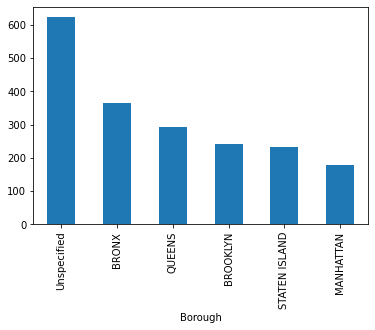

In [70]:
df_opencasetime.astype('timedelta64[m]').plot(kind='bar')

---
Top 10 complaints that take the longest to resolve:

In [72]:
df_opencasetime = df['Open Case Time'].groupby(df['Complaint Type']).mean().sort_values(ascending=False)
df_opencasetime.head(10)

Complaint Type
Animal in a Park               14 days 00:50:05
Derelict Vehicle      0 days 07:21:50.902717762
Graffiti              0 days 07:09:04.504424778
Agency Issues         0 days 05:15:37.166666666
Animal Abuse          0 days 05:12:47.677780638
Blocked Driveway      0 days 04:44:27.258638198
Illegal Parking       0 days 04:30:04.145454301
Panhandling           0 days 04:22:21.963934426
Homeless Encampment   0 days 04:21:56.052536231
Squeegee                 0 days 04:02:44.250000
Name: Open Case Time, dtype: timedelta64[ns]

<AxesSubplot:xlabel='Complaint Type'>

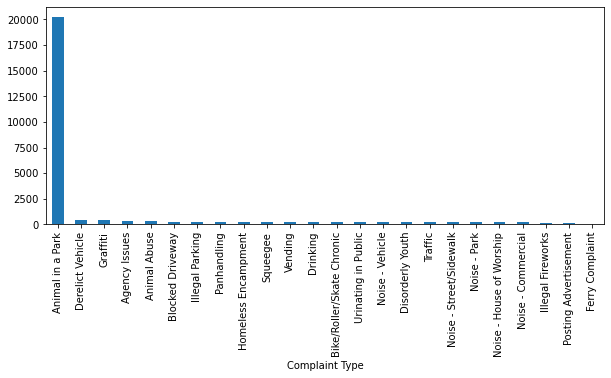

In [74]:
plt.figure(figsize=(10,4))
df_opencasetime.astype('timedelta64[m]').plot(kind='bar')

<AxesSubplot:xlabel='Complaint Type'>

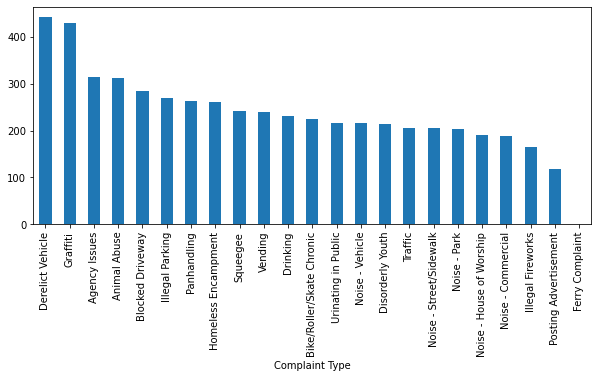

In [82]:
plt.figure(figsize=(10,4))
df_opencasetime.drop('Animal in a Park').astype('timedelta64[m]').plot(kind='bar')

**Observations**:  There is signficant difference in mean of Open Case Time for different Complaints.

---
### **Recommedations:**

1) Analyze the service processes in the neighborhoods with the most requests (Brooklyn, Queens and Bronx) to decrease the time that cases remain open.
   
2) Since driveway blocking (and correlated issues) and noise constitute the largest number of requests, specialized teams could be directed. As done by the 34th Precinct that has been working to address noisy businesses along Dyckman Street since 2018, focusing on the hot spots with the most complaints and adding more officers to midnight patrol. [Source](https://nypost.com/2018/03/04/these-nyc-neighborhoods-have-the-most-noise-complaints/).